In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

from tqdm import tqdm

In [ ]:
DATADIR = "C:/Users/Malik M. Ishaq/Desktop/HISB/Week 5/flowers"
IMG_SIZE = 180
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_data()

print(len(data))


FileNotFoundError: ignored

In [ ]:
X = []
y = []

for features,label in tqdm(data):
    X.append(features)
    y.append(label)

100%|██████████| 4323/4323 [00:00<00:00, 382208.60it/s]


In [ ]:
X = np.array(X)
X = X.  astype('float32') / 255
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 49)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 96)        0

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)


In [ ]:
history = model.fit(
    datagen.flow(x_train,y_train, batch_size=128),
    epochs = 5, validation_data = (x_test,y_test),
    steps_per_epoch=x_train.shape[0] // 128
)
# history = model.fit(x_train, y_train, epochs=20,
#                     validation_data=(x_test, y_test))


Epoch 1/5
20/20 [==============================] - 163s 8s/step - loss: 1.5491 - accuracy: 0.2994 - val_loss: 1.2841 - val_accuracy: 0.4561
Epoch 2/5
20/20 [==============================] - 178s 9s/step - loss: 1.2184 - accuracy: 0.4978 - val_loss: 1.1437 - val_accuracy: 0.5052
Epoch 3/5
20/20 [==============================] - 156s 8s/step - loss: 1.1220 - accuracy: 0.5473 - val_loss: 1.0555 - val_accuracy: 0.5584
Epoch 4/5
20/20 [==============================] - 154s 8s/step - loss: 1.0446 - accuracy: 0.5846 - val_loss: 1.1666 - val_accuracy: 0.5405
Epoch 5/5
20/20 [==============================] - 145s 7s/step - loss: 0.9988 - accuracy: 0.6045 - val_loss: 0.9238 - val_accuracy: 0.6312


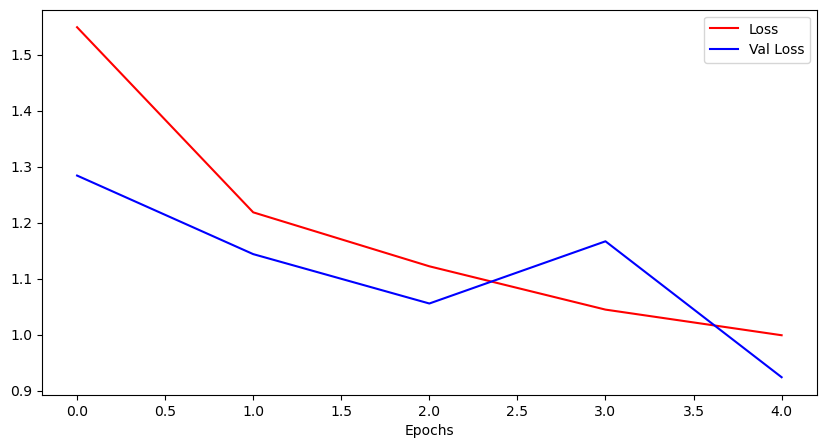

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label = "Loss", color = "r")
plt.plot(history.history["val_loss"], label = "Val Loss", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()

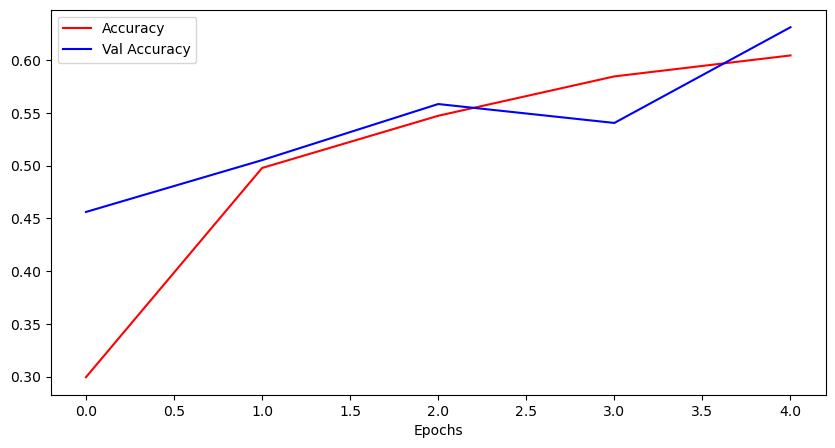

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Accuracy", color = "r")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

55/55 [==============================] - 23s 412ms/step - loss: 0.9238 - accuracy: 0.6312
0.9237796068191528 0.6312138438224792
